In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from XRD import crystal, Element, XRD
import sys
import os
from similarity import Similarity

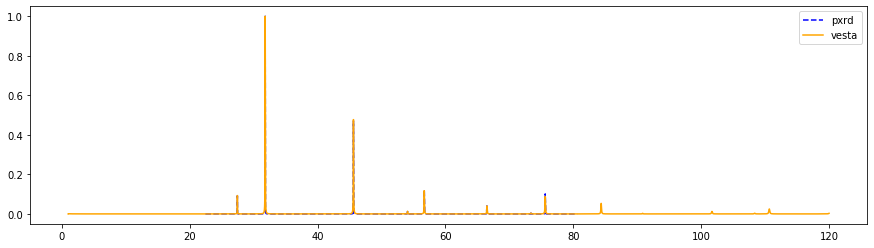

Similarity =  0.9592905875430497


In [3]:
wavelength = 1.54056
max2theta = 80
struct = crystal('cif',filename='NaCl.cif')
N = 100000

# define profiling here
profiling = {'function': 'pseudo-voigt', 'X': 0.005978, 'V' : 0.095}
# profiling = {'function': 'lorentzian', 'X': 0.089}
# profiling = {'function': 'gaussian', 'V': 0.25}

# pxrd 
xrd1 = XRD(struct, wavelength, max2theta, False, 0.55)   
xrd1.get_profile(xrd1.theta2, xrd1.xrd_intensity/np.max(xrd1.xrd_intensity), N, **profiling)
px = xrd1.spectra[0]
py = xrd1.spectra[1]

# profiling from vesta  
merc_pattern = np.loadtxt('NaCl-Vesta.int')
mx = merc_pattern[:,0]
my = merc_pattern[:,1]/np.max(merc_pattern[:,1])
patterng = np.vstack((mx,my))

plt.figure(figsize=(15,4))
plt.plot(px,py,'b--',label = 'pxrd')
plt.plot(mx,my, 'orange',label = 'vesta')
# plt.xlim([30,33]) # zoom in on individual peaks to refine U and V
plt.legend()
plt.show()

S = Similarity(xrd1.spectra, patterng, N, None, 1, 'cosine')
print('Similarity = ',S.calculate())

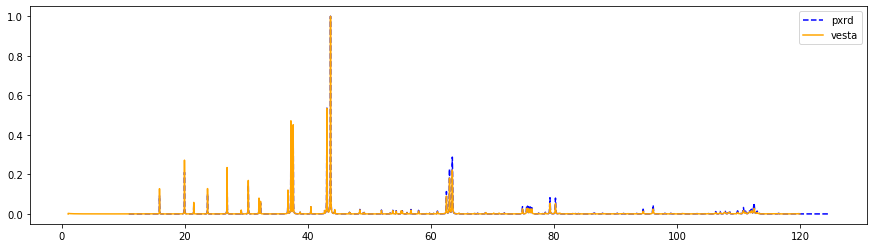

Similarity =  0.9925994767328037


In [9]:
wavelength = 1.54056
max2theta = 120
struct = crystal('POSCAR',filename='/Users/sayred1/Research/dXRD/XRD/data/A2=m-POSCAR')
profiling = {'function': 'pseudo-voigt', 'X': 0.03678, 'V' : 0.087}

# pxrd 
xrd1 = XRD(struct, wavelength, max2theta, False, 0.55)   
xrd1.get_profile(xrd1.theta2, xrd1.xrd_intensity/np.max(xrd1.xrd_intensity), N, **profiling)
px = xrd1.spectra[0]
py = xrd1.spectra[1]

# profiling from vesta  
merc_pattern = np.loadtxt('A2=m.int')
mx = merc_pattern[:,0]
my = merc_pattern[:,1]/np.max(merc_pattern[:,1])
patterng = np.vstack((mx,my))

plt.figure(figsize=(15,4))
plt.plot(px,py,'b--',label = 'pxrd')
plt.plot(mx,my, 'orange',label = 'vesta')
# plt.xlim([60,65.25]) # zoom in on individual peaks to refine U and V
plt.legend()
plt.show()

S = Similarity(xrd1.spectra, patterng, N, None, 1, 'cosine')
print('Similarity = ',S.calculate())